### 1. Responda

a. No contexto de ciência de dados, o que é uma feature? Por que as features precisam ser tratadas antes de serem aplicadas nos algoritmos de Machine Learning?

R: Uma feature é uma característica ou atributo de um dado, como idade, altura ou cor. As features precisam ser tratadas para garantir que estejam no formato e escala corretos, sem valores ausentes ou inconsistentes, facilitando o aprendizado dos algoritmos de Machine Learning.

b. Sabendo que nem todas as features em um dataset são úteis para os modelos de Machine Learning, explique como as features de fato úteis podem ser selecionadas através dos métodos de filtragem, wrapper e embedding.

R: 
- Filtragem: Seleciona features com base em testes estatísticos, como correlação ou teste qui-quadrado, sem usar um modelo.
- Wrapper: Usa um modelo de Machine Learning para testar diferentes subconjuntos de features e escolher o melhor.
- Embedding: O próprio modelo seleciona as features durante o treinamento, como ocorre com regularização L1 (Lasso).

c. Explique com suas palavras o que são escalares, vetores e espaços vetoriais. Dê a sua resposta ilustrando cada conceito com dados usados em algoritmos de Machine Learning.

R:
- Escalar: Um único valor, como a idade de uma pessoa (ex: 25).
- Vetor: Um conjunto ordenado de escalares, como [idade, peso, altura] = [25, 70, 1.75].
- Espaço vetorial: O conjunto de todos os vetores possíveis, por exemplo, todas as combinações de [idade, peso, altura] de um grupo de pessoas.

### 2. Considere o breast cancer dataset.

a. Identifique as features contínuas deste dataset.

- R: As features contínuas do breast cancer dataset incluem: `mean radius`, `mean texture`, `mean perimeter`, `mean area`, `mean smoothness`, entre outras.

In [135]:
#b. Selecione duas features contínuas do dataset e realize a discretização dessas variáveis por meio de quantização por bins fixos. Apresente os resultados.
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
features = ['mean radius', 'mean texture']

for col in features:
    df[col+'_binned'] = pd.cut(df[col], bins=3, labels=False)

df[[features[0], features[0]+'_binned', features[1], features[1]+'_binned']].head()

,mean radius,mean radius_binned,mean texture,mean texture_binned
0,17.99,1,10.38,0
1,20.57,1,17.77,0
2,19.69,1,21.25,1
3,11.42,0,20.38,1
4,20.29,1,14.34,0


In [136]:
#c. Selecione duas features contínuas do dataset (podem ser as mesmas do item (b)) e realize a discretização dessas variáveis por meio de quantização por bins variáveis. Apresente os resultados.
for col in features:
    df[col+'_qbin'] = pd.qcut(df[col], q=3, labels=False)

df[[features[0], features[0]+'_qbin', features[1], features[1]+'_qbin']].head()

,mean radius,mean radius_qbin,mean texture,mean texture_qbin
0,17.99,2,10.38,0
1,20.57,2,17.77,1
2,19.69,2,21.25,2
3,11.42,0,20.38,1
4,20.29,2,14.34,0


# 3. Considere o breast cancer dataset.

In [137]:
#a. Defina uma função personalizada que realize uma normalização nas features do dataset usando FunctionTransformer do sklearn. Apresente os resultados obtidos.
from sklearn.preprocessing import FunctionTransformer

def custom_norm(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

transformer = FunctionTransformer(custom_norm)
df_norm = transformer.fit_transform(df[data.feature_names])
pd.DataFrame(df_norm, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [138]:
#b. Utilize o PowerTransform para normalizar as features do dataset. Apresente os resultados obtidos.
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df_power = pt.fit_transform(df[data.feature_names])
pd.DataFrame(df_power, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.134881,-2.678666,1.259822,1.126421,1.504114,2.165938,1.862988,1.848558,1.953067,1.886398,...,1.619635,-1.488367,1.810506,1.652210,1.282792,1.942737,1.730182,1.935654,2.197206,1.723624
1,1.619346,-0.264377,1.528723,1.633946,-0.820227,-0.384102,0.291976,0.820609,0.102291,-0.956577,...,1.578689,-0.288382,1.430616,1.610022,-0.325080,-0.296580,0.070746,1.101594,-0.121997,0.537179
2,1.464796,0.547806,1.454664,1.461645,0.963977,1.163977,1.403673,1.683104,0.985668,-0.292433,...,1.419757,0.071406,1.321941,1.425307,0.580301,1.209701,1.005512,1.722744,1.218181,0.453955
3,-0.759262,0.357721,-0.514886,-0.836238,2.781494,2.197843,1.642391,1.423004,2.360528,2.708925,...,-0.083692,0.228089,-0.039480,-0.436860,2.857821,2.282276,1.675087,1.862378,3.250202,2.517606
4,1.571260,-1.233520,1.583340,1.595120,0.343932,0.762392,1.407479,1.410929,0.090964,-0.511332,...,1.293727,-1.637882,1.316582,1.309486,0.284367,-0.131829,0.817474,0.807077,-0.943554,-0.279402


# 4. Considere o breast cancer dataset.

In [139]:
#a. Faça uma normalização das features do dataset usando o MinMaxScaler. Apresente os resultados obtidos.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df[data.feature_names])
pd.DataFrame(df_minmax, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [140]:
#b. Faça o escalonamento padrão das features do dataset usando o StandardScaler. Apresente os resultados obtidos.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df[data.feature_names])
pd.DataFrame(df_std, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [141]:
#c. Faça a regularização das features do dataset usando a norma L2. Apresente os resultados obtidos.
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
df_l2 = normalizer.fit_transform(df[data.feature_names])
pd.DataFrame(df_l2, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


d. É possível aplicar simultaneamente dois ou mesmo os três métodos dos itens anteriores? Explique.

R: Sim, é possível combinar métodos como MinMaxScaler, StandardScaler e Normalizer. Por exemplo, pode-se normalizar os dados e depois aplicar a regularização L2. A ordem pode afetar o resultado final.

# 5. Considere o Large Movie Review Dataset (Large Movie Review Dataset)

In [142]:
#5. Large Movie Review Dataset - Carregar reviews reais
import os

base_path = r"e:\at-infnet\datasets\aclImdb\test"
reviews = []
labels = []

for label in ['pos', 'neg']:
    folder = os.path.join(base_path, label)
    files = os.listdir(folder)[:100] 
    for fname in files:
        with open(os.path.join(folder, fname), encoding='utf-8') as f:
            reviews.append(f.read())
            labels.append(1 if label == 'pos' else 0)

#a Remover stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS])

reviews_nostop = [remove_stopwords(r) for r in reviews]

In [143]:
#b. Realize o stemming das expressões contidas nas features resultantes da operação realizada no item (a).
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

reviews_stemmed = [stem_text(r) for r in reviews_nostop]
print(reviews_stemmed)

["went saw movi night coax friend mine. i'll admit reluct knew ashton kutcher abl comedy. wrong. kutcher play charact jake fischer well, kevin costner play ben randal professionalism. sign good movi toy emotions. did exactli that. entir theater (which sold out) overcom laughter half movie, move tear second half. exit theater saw women tears, grown men well, tri desper let crying. movi great, suggest judge.", 'actor turn director paxton follow promis debut, gothic-horror "frailty", famili friendli sport drama 1913 u.s. open young american caddi rise humbl background play bristish idol dub "the greatest game played." i\'m fan golf, scrappi underdog sport flick dime dozen (most recent grand effect "miracle" "cinderella man"), film enthral same.<br /><br />the film start creativ open credit (imagin disneyfi version anim open credit hbo\' "carnivale" "rome"), lumber slowli by-the-numb hour. action move u.s. open thing pick well. paxton doe nice job show knack effect directori flourish (i lo

In [144]:
#c. Realize a lemmatization das expressões contidas nas features resultantes da operação realizada no item (a)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

reviews_lemmatized = [lemmatize_text(r) for r in reviews_nostop]
print(reviews_lemmatized)

["went saw movie night coaxed friend mine. I'll admit reluctant knew Ashton Kutcher able comedy. wrong. Kutcher played character Jake Fischer well, Kevin Costner played Ben Randall professionalism. sign good movie toy emotions. did exactly that. entire theater (which sold out) overcome laughter half movie, moved tear second half. exiting theater saw woman tears, grown men well, trying desperately let crying. movie great, suggest judge.", 'Actor turned director Paxton follows promising debut, Gothic-horror "Frailty", family friendly sport drama 1913 U.S. Open young American caddy rise humble background play Bristish idol dubbed "The Greatest Game Played." I\'m fan golf, scrappy underdog sport flick dime dozen (most recently grand effect "Miracle" "Cinderella Man"), film enthralling same.<br /><br />The film start creative opening credit (imagine Disneyfied version animated opening credit HBO\'s "Carnivale" "Rome"), lumber slowly by-the-numbers hour. action move U.S. Open thing pick well

In [145]:
#d. Utilize a técnica de Bag-of-Words para vetorizar as resenhas do dataset resultante das operações do item (b). Apresente os resultados obtidos.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(reviews_stemmed)
print(X_bow.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '10' ... 'zwart' 'zzzzzzzzzzzzz' 'ís']


In [146]:
#e. Utilize a técnica de Bag-of-n-Grams, identificando bigrams, para vetorizar as resenhas do dataset resultante das operações do item (c). Apresente os resultados obtidos.
vectorizer = CountVectorizer(ngram_range=(2,2))
X_bigrams = vectorizer.fit_transform(reviews_lemmatized)
print(X_bigrams.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00 couple' '000 rebel' '000 voices' ... 'zwart just' 'zzzzzzzzzzzzz way'
 'ís romantic']


### 6. Considere o Large Movie Review Dataset (Large Movie Review Dataset)

In [147]:
#a. Redimensione os dados do dataset pelo método term frequency–inverse document frequency (tf-idf). Apresente os resultados obtidos.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(reviews_lemmatized)
print(X_tfidf.toarray())
print(tfidf.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '000' '10' ... 'zwart' 'zzzzzzzzzzzzz' 'ís']


In [148]:
#6b. Classificação com Regressão Logística
from sklearn.linear_model import LogisticRegression
import numpy as np

y = np.array(labels)
model = LogisticRegression(max_iter=1000)
model.fit(X_tfidf, y)
print("Acurácia:", model.score(X_tfidf, y))

Acurácia: 1.0


### 7. Considere o powerlifting database (powerlifting-database)

In [149]:
#7. Powerlifting Database
df_power = pd.read_csv(r"e:\at-infnet\datasets\openpowerlifting.csv")

#a. One-hot Encoding
pd.get_dummies(df_power['Sex']) 

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
386409,False,True
386410,False,True
386411,False,True
386412,False,True


In [150]:
#b. Dummy Coding
pd.get_dummies(df_power['Sex'], drop_first=True)

,M
0,False
1,False
2,False
3,False
4,False
...,...
386409,True
386410,True
386411,True
386412,True


In [151]:
#c. Effect Coding
import patsy
effect_coded = patsy.dmatrix('C(Sex, Treatment)', df_power, return_type='dataframe')
print(effect_coded.head())

   Intercept  C(Sex, Treatment)[T.M]
0        1.0                     0.0
1        1.0                     0.0
2        1.0                     0.0
3        1.0                     0.0
4        1.0                     0.0


### 8. Explique com suas palavras quais são as vantagens e as desvantagens de se realizar a vetorização de variáveis categóricas de um dataset.

**Vantagens:** Permite que variáveis categóricas sejam usadas em modelos matemáticos.  
**Desvantagens:** Pode aumentar muito a dimensionalidade e causar esparsidade, dificultando o processamento.

In [152]:
#a.i. Feature Hashing
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=4, input_type='string')
hashed = fh.transform([[x] for x in df_power['Sex'].astype(str)])
print(hashed.toarray())

[[ 0.  0. -1.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0. -1.  0.]
 ...
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]]


In [153]:
#a.ii. Compacte as features categóricas da base de dados usando Bin Counting.
print(df_power.columns)
print(df_power['Sex'].value_counts())

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')
Sex
M    299045
F     87369
Name: count, dtype: int64


a.iii. Analise os resultados obtidos no itens (i) e (ii).

- R: Feature Hashing reduz a dimensionalidade, mas pode causar colisões de categorias diferentes no mesmo hash. Bin Counting apenas conta ocorrências, não gera vetores para modelos.

### 9. Responda com as suas palavras:

a. O que é uma projeção linear?
- R: É uma transformação que projeta dados de um espaço de maior dimensão para um de menor dimensão, preservando relações lineares.

b. Como uma projeção linear é aplicada a um espaço de dados?
- R: Multiplica-se o vetor de dados por uma matriz de projeção (ex: matriz de componentes principais).

c. Descreva os passos executados pelo algoritmo de PCA para realizar a extração das componentes principais e, assim, reduzindo a dimensionalidade do dataset.
1. Centralizar os dados.
2. Calcular matriz de covariância.
3. Calcular autovalores e autovetores.
4. Ordenar autovetores pelos maiores autovalores.
5. Projetar os dados nos autovetores principais.

### 10. Considere o Lung Cancer Prediction Dataset (Lung Cancer Prediction Dataset)

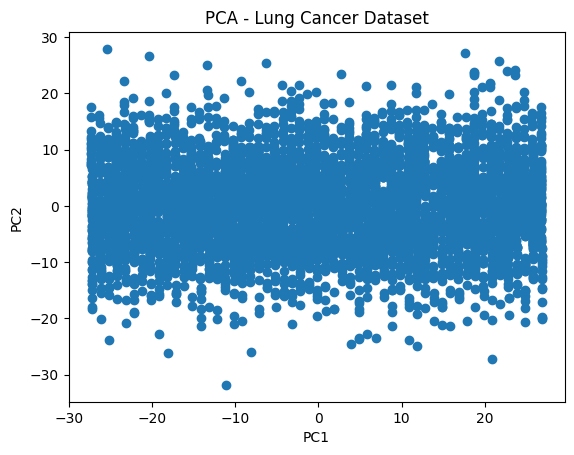

In [154]:
# a. Aplique o algoritmo de PCA e selecione as componentes mais relevantes. Apresente os resultados graficamente.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df_lung = pd.read_csv(r"e:\at-infnet\datasets\lung-cancer-dataset.csv")
X = df_lung.select_dtypes(include='number').dropna()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Lung Cancer Dataset')
plt.show()

# 11. Responda:

a. Qual a relação entre o processo conhecido como whitening e o PCA? Explique.
- R: Whitening transforma os dados para que as variáveis fiquem descorrelacionadas e com variância 1. O PCA pode ser usado como etapa do whitening.

b. Explique qual o procedimento necessário para se escolher o número de componentes principais baseando-se na curva de carga.
- R: Baseia-se na curva de variância explicada (scree plot): escolhe-se o ponto onde a curva se estabiliza (cotovelo).

# 12. Responda:

a. O algoritmo de PCA poderia ser aplicado a qualquer tipo de base de dados? Explique.
- R: Não. PCA só funciona bem com dados numéricos e relações lineares. Não é adequado para dados categóricos ou relações não-lineares.

b. Quais são as principais limitações do PCA? Explique a sua resposta.
- Só captura relações lineares.
- Sensível à escala dos dados.
- Não lida com dados categóricos.
- Pode ser difícil interpretar os componentes.